In [178]:
import pandas as pd
from utility import *
import sklearn.model_selection as model_selection
from sklearn.metrics import mean_squared_error, precision_score, recall_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
import keras.optimizers

from keras.layers import BatchNormalization

xtrain = pLoad("xtrain")
xtrain2 = pLoad("xtrain2")
xtrain_noelem = pLoad("xtrain_noelem")
xtrain_noelem2 = pLoad("xtrain_noelem2")
ytrain = pLoad("ytrain")
ytest = pLoad("ytest")
xtest = pLoad("xtest")
xtest2 = pLoad("xtest2")
xtest_noelem2 = pLoad("xtest_noelem2")


xtrainBalanced = pLoad("xtrainBalanced")
ytrainBalanced = pLoad("ytrainBalanced")
yvalBalanced = pLoad("yvalBalanced")

trainindices = pLoad("trainindices")
valindices = pLoad("valindices")


trivtrain = pLoad("trivialtrain")
trivval = pLoad("trivialval")
ntrivtrain = pLoad("nontrivialtrain")
ntrivval = pLoad("nontrivialval")

# Neural network
In this part a feed forward neural network will be constructed looking a a number of architectures. Due to the large number of models explored, only representative models during model construction will be shown. Models were chosen by comparing the performance on the test sets. Due to the high number of dummy element variables, models with dummy element variables will not be considered to limit the neural network input layer size as training is being performed on a laptop without a suitable GPU.

## training using initial training data set

In [31]:
# fix random seed for reproducibility
np.random.seed(7)
from keras.layers import BatchNormalization


xin = xtrain
yin = ytrain[:,1:10]
history = []
trainscores = {}

for rate in [1e-4]:
    i+=1
    for layer in [10]:
        model = Sequential()
        model.add(Dense(layer, input_dim = xin.shape[1], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(layer,  activation='relu'))
        model.add(Dense(1,  activation='sigmoid'))
        model.add(Dense(9, activation='softmax'))
        optimizer = keras.optimizers.Adagrad(lr=rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'])
        print(model.summary())
        history.append(model.fit(xin, yin, verbose = 2, validation_split = 0.2, epochs=1000, batch_size=32))

        trainscores[(rate, layer)] = model.evaluate(xin, yin)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_418 (Dense)            (None, 10)                2610      
_________________________________________________________________
batch_normalization_123 (Bat (None, 10)                40        
_________________________________________________________________
dropout_61 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_419 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_420 (Dense)            (None, 1)                 11        
_________________________________________________________________
dense_421 (Dense)            (None, 9)                 18        
Total params: 2,789
Trainable params: 2,769
Non-trainable params: 20
_________________________________________________________________
None
Tr

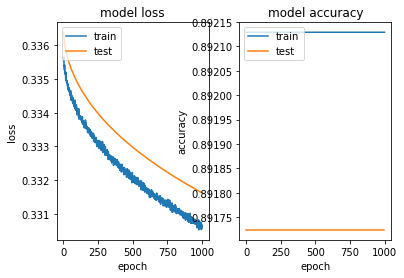

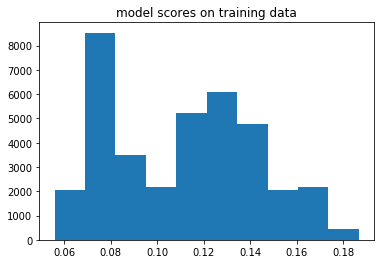

In [37]:
for h in history:
    # summarize history for loss
    plt.subplot(121)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(122)
    # summarize history for accuracy
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
plt.title("model scores on training data")
plt.hist(model.predict(xtrain).flatten())
plt.show()

Likewise training using a dataset with the trivial vectors removed does not have a benefit

In [61]:
# fix random seed for reproducibility
np.random.seed(7)
from keras.layers import BatchNormalization


xin = xtrain.iloc[ntrivtrain]
yin = ytrain[ntrivtrain,1:10]
history = []
trainscores = {}

for rate in [1e-4]:
    i+=1
    for layer in [10]:
        model = Sequential()
        model.add(Dense(layer, input_dim = xin.shape[1], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(layer,  activation='relu'))
        model.add(Dense(1,  activation='sigmoid'))
        model.add(Dense(9, activation='softmax'))
        optimizer = keras.optimizers.Adagrad(lr=rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'])
        print(model.summary())
        history.append(model.fit(xin, yin, verbose = 2, validation_split = 0.2, epochs=500, batch_size=32))

        trainscores[(rate, layer)] = model.evaluate(xin, yin)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_443 (Dense)            (None, 10)                2610      
_________________________________________________________________
batch_normalization_130 (Bat (None, 10)                40        
_________________________________________________________________
dropout_68 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_444 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_445 (Dense)            (None, 1)                 11        
_________________________________________________________________
dense_446 (Dense)            (None, 9)                 18        
Total params: 2,789
Trainable params: 2,769
Non-trainable params: 20
_________________________________________________________________
None
Tr

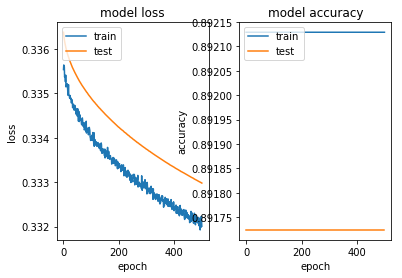

In [63]:
for h in history:
    # summarize history for loss
    plt.subplot(121)
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(122)
    # summarize history for accuracy
    plt.plot(h.history['acc'])
    plt.plot(h.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Similar to the logistic regression case, a model will be created for every element in the vector and trained using the initial training data.

0.005 1


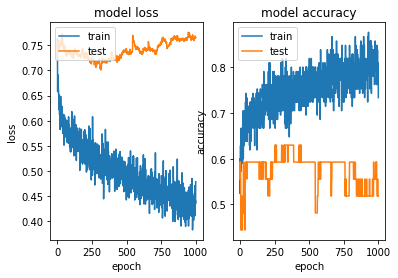

0.005 2


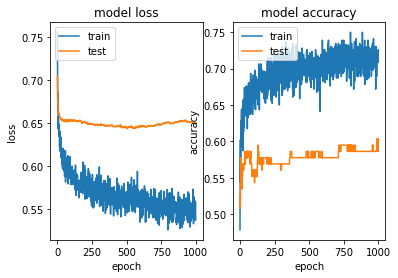

0.005 3


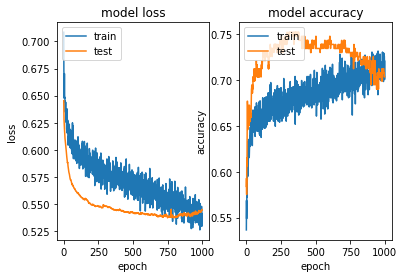

0.005 4


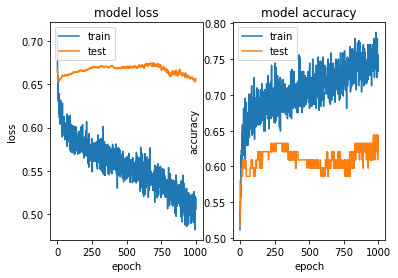

0.005 5


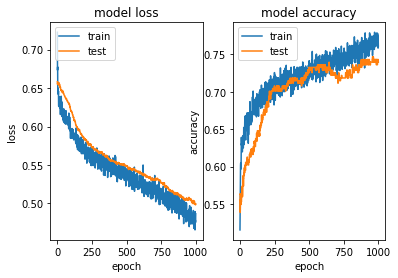

0.005 6


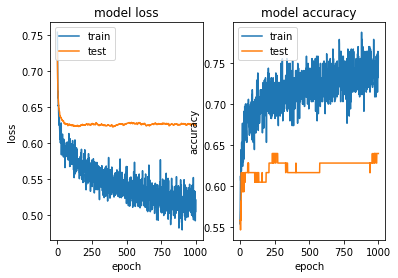

0.005 7


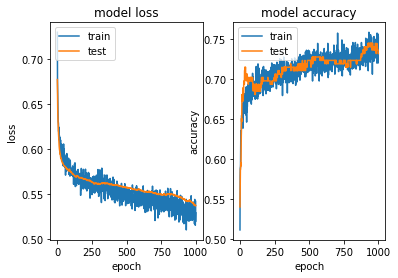

0.005 8


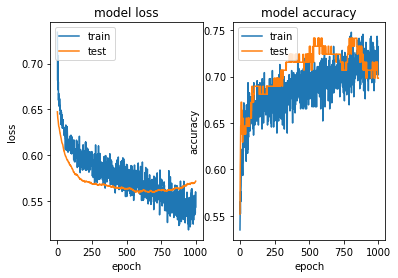

0.005 9


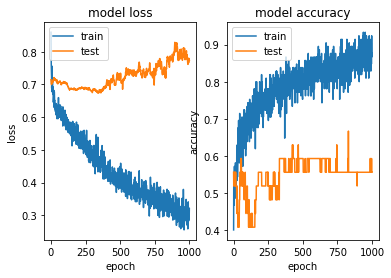

In [22]:


history = []
layer = 10

for i in range(1,10):
    xin = xtrain_noelem2.iloc[trainindices[i]]
    yin = ytrain[trainindices[i],i]
    for rate in [5e-3]:
        print(rate,i)
        model = Sequential()
        model.add(Dense(layer, input_dim = xin.shape[1], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(layer,  activation='relu'))
        model.add(Dense(1,  activation='sigmoid'))
        optimizer = keras.optimizers.Adagrad(lr=rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'])
        #print(model.summary())
        history = model.fit(xin, yin, verbose = 0, validation_split = 0.2, epochs=1000, batch_size=32)
        history = history.history
        plt.subplot(121)
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.subplot(122)
        # summarize history for accuracy
        plt.plot(history['acc'])
        plt.plot(history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()


The model learns for indicies 3, 5, and 7 in vector dimensions and primarily overfits for others due to differnces in number of observations between each dimension in balanced data (3, 5, and 7 have the most observations).

Testing increased dropout to reduce overfitting for low observation dimensions

0.005 1


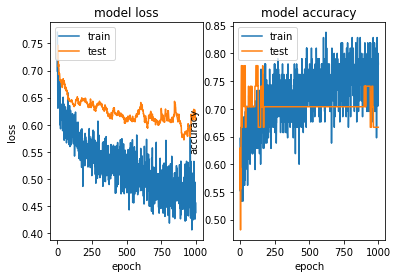

0.005 2


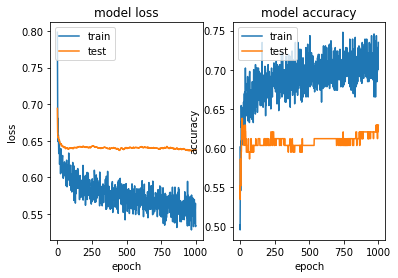

0.005 4


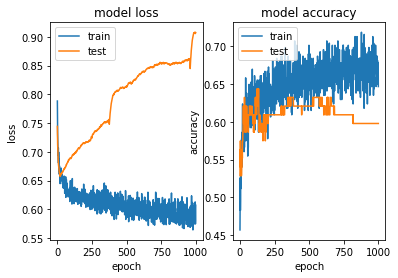

0.005 6


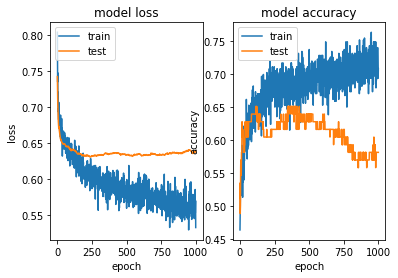

0.005 8


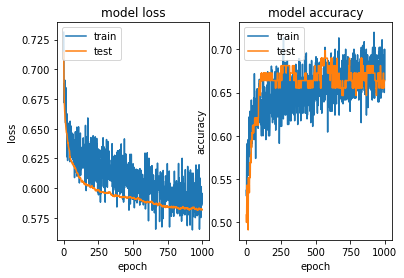

In [27]:


history = []
layer = 10

for i in [1,2,4,6,8]:
    xin = xtrain_noelem2.iloc[trainindices[i]]
    yin = ytrain[trainindices[i],i]
    for rate in [5e-3]:
        print(rate,i)
        model = Sequential()
        model.add(Dense(layer, input_dim = xin.shape[1], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        model.add(Dense(layer,  activation='relu'))
        model.add(Dense(1,  activation='sigmoid'))
        optimizer = keras.optimizers.Adagrad(lr=rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'])
        #print(model.summary())
        history = model.fit(xin, yin, verbose = 0, validation_split = 0.2, epochs=1000, batch_size=32)
        history = history.history
        plt.subplot(121)
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.subplot(122)
        # summarize history for accuracy
        plt.plot(history['acc'])
        plt.plot(history['val_acc'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()


## Setting up model and training
Using models based on above where higher dropout is used for dimensions with fewer observations in the balanced data set to reduced overfitting.

In [117]:
models = [[] for i in range(10)]
rate = 5e-3
for i in (3,5,7):
        model = Sequential()
        model.add(Dense(layer, input_dim = 114, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(layer,  activation='relu'))
        model.add(Dense(1,  activation='sigmoid'))
        optimizer = keras.optimizers.Adagrad(lr=rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'])
        models[i] = model
        
for i in (1,2,4,6,8,9):
        model = Sequential()
        model.add(Dense(layer, input_dim = 114, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        model.add(Dense(layer,  activation='relu'))
        model.add(Dense(1,  activation='sigmoid'))
        optimizer = keras.optimizers.Adagrad(lr=rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['mean_squared_error', 'accuracy'])
        models[i] = model

training model:  1


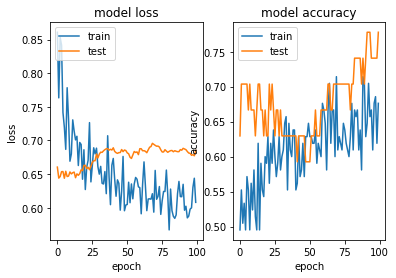

training model:  2


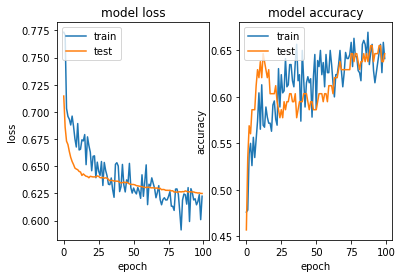

training model:  3


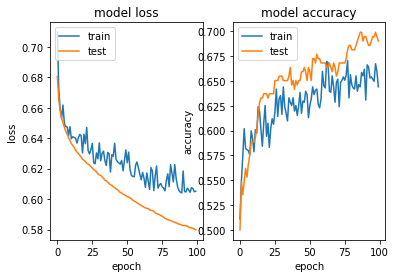

training model:  4


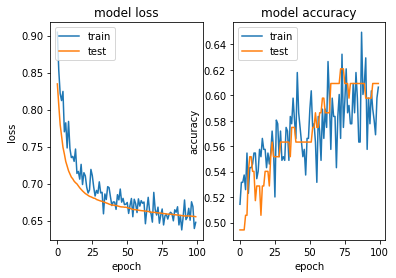

training model:  5


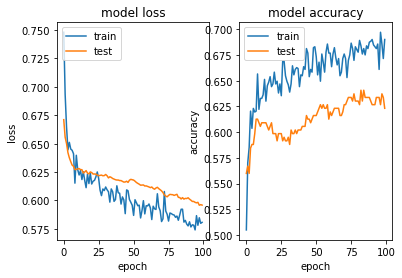

training model:  6


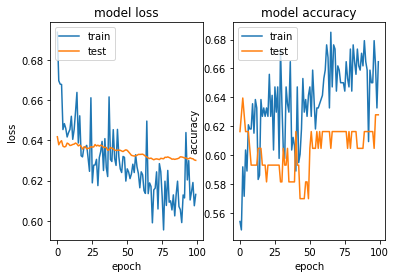

training model:  7


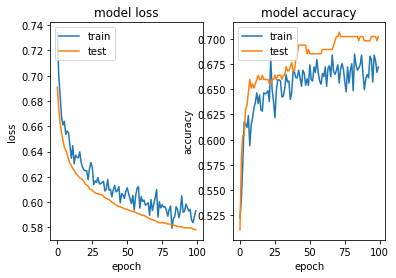

training model:  8


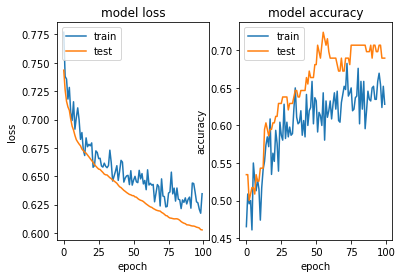

training model:  9


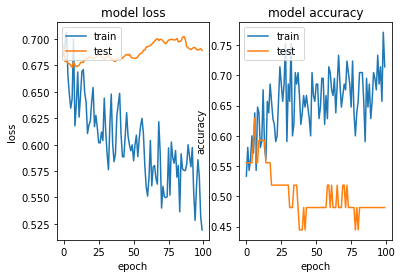

training model:  1


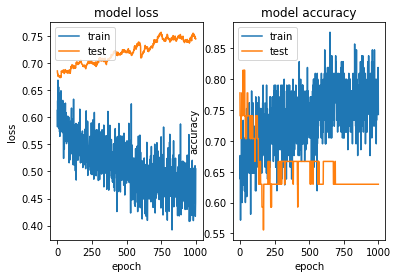

training model:  2


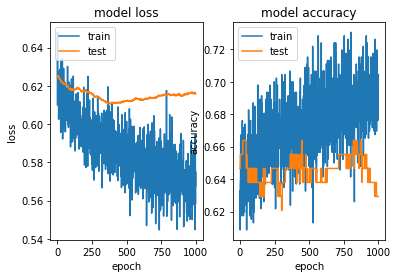

training model:  3


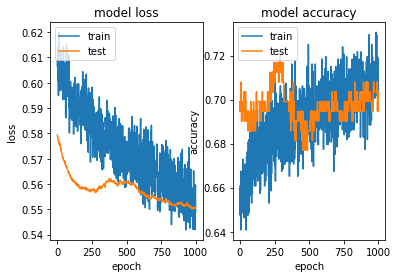

training model:  4


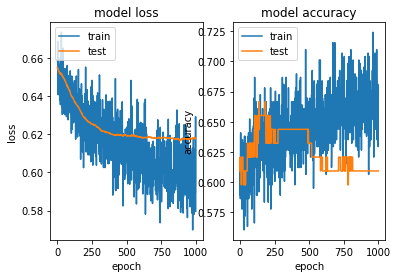

training model:  5


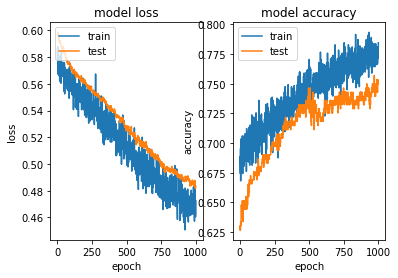

training model:  6


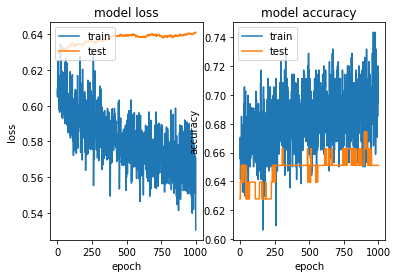

training model:  7


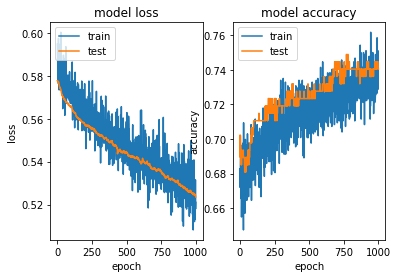

training model:  8


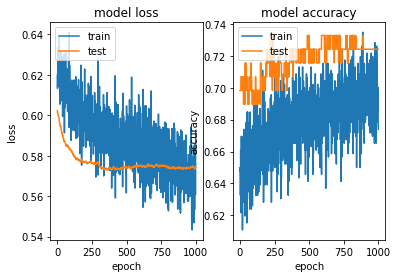

training model:  9


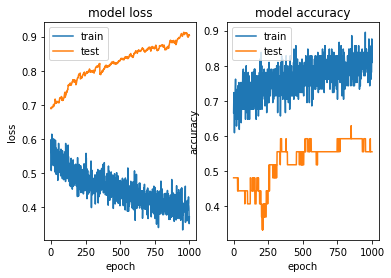

In [118]:


def trainmodel(models, xin, yin, i, epochs, ins):
    print("training model: ", str(i))
    currtime = time.strftime("%X")
    model = models[i]
    history = model.fit(xin, yin, verbose = 0, validation_split = 0.2, epochs=epochs, batch_size=32)
    history = history.history
    plt.subplot(121)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(122)
    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    model.save_weights('ilayers_' + ins + '_' + str(i) + '.h5')

    
for i in range(1,10):
    xin = xtrain_noelem2.iloc[trainindices[i]]
    yin = ytrain[trainindices[i],i]
    trainmodel(models, xin, yin, i, 100, "0217_2")
    
for i in range(1,10):
    xin = xtrain_noelem2.iloc[trainindices[i]]
    yin = ytrain[trainindices[i],i]
    trainmodel(models, xin, yin, i, 1000, "0217_3")

training model:  1


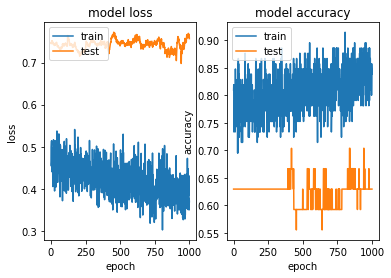

training model:  2


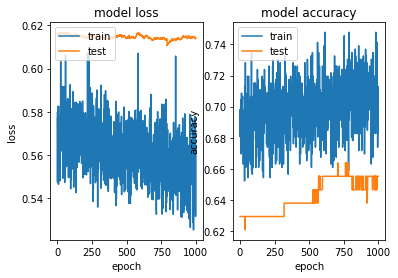

training model:  3


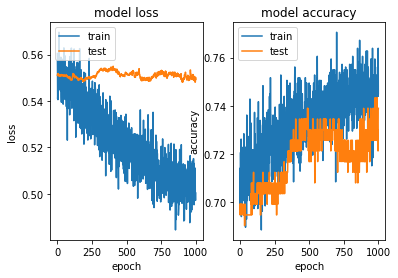

training model:  4


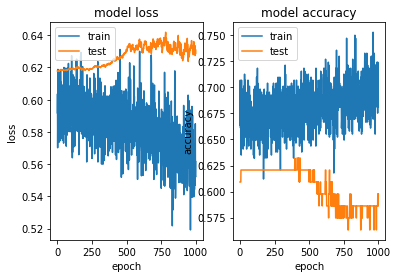

training model:  5


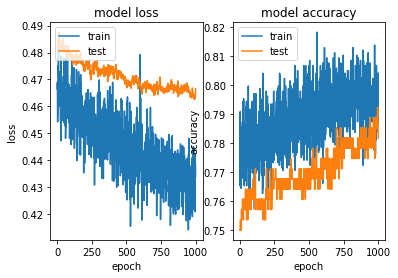

training model:  6


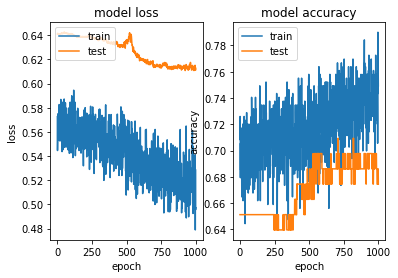

training model:  7


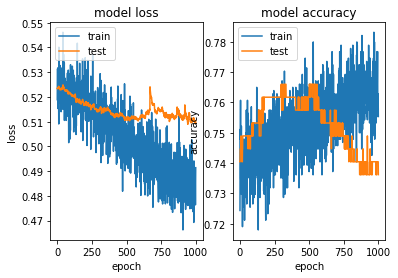

training model:  8


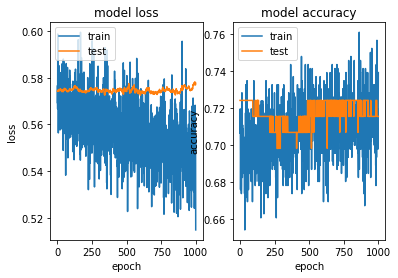

training model:  9


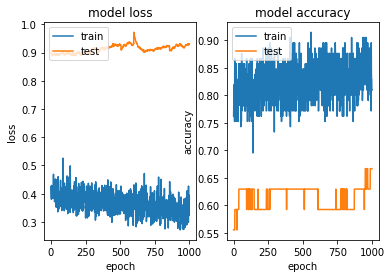

In [119]:
for i in range(1,10):
    xin = xtrain_noelem2.iloc[trainindices[i]]
    yin = ytrain[trainindices[i],i]
    trainmodel(models, xin, yin, i, 1000, "0240_1")

## evaluating performance 

stability vector index:  1 train mse:  0.08950080271022562
stability vector index:  2 train mse:  0.19921915277512633
stability vector index:  3 train mse:  0.17505132054213954
stability vector index:  4 train mse:  0.21243866995548424
stability vector index:  5 train mse:  0.17723049738970084
stability vector index:  6 train mse:  0.24977363580504713
stability vector index:  7 train mse:  0.17827090948362156
stability vector index:  8 train mse:  0.18980892869646895
stability vector index:  9 train mse:  0.11938094297485947
average mse:  0.17674165114807489


In [201]:
#predicts values for xin and calculates mse if yin is provided
def predict(models, xin, yin = None):
    scores = np.zeros([xin.shape[0],yin.shape[1]])
    for i in range(1,10):
        scores[:, i - 1] = models[i].predict(xin).flatten()
        
    mse = mean_squared_error(yin, scores)
    preds = (scores > 0.5).astype(int)
    if yin is not None:
        return scores, preds, mse
    
    else:
        return scores, preds, None
trainscores, trainpreds, trainMSE = predict(models, xtrain_noelem2, ytrain[:,1:10])
testscores, testpreds, testMSE = predict(models, xtest_noelem2, ytest[:,1:10])

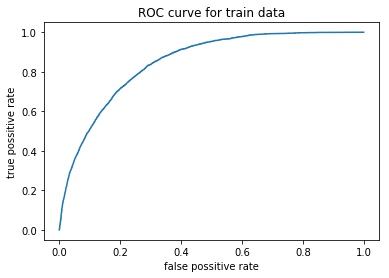

In [202]:
fpr, tpr, thresholds = roc_curve(ytrain[:,1:10].flatten(), trainscores.flatten())
plt.plot(fpr,tpr)
plt.xlabel("false possitive rate")
plt.ylabel("true possitive rate")
plt.title("ROC curve for train data")
plt.show()

In [207]:
print("MSE train",trainMSE)
print("MSE test",testMSE)
print("precission test",precision_score(testpreds.flatten(), ytest[:,1:10].flatten()))
print("recall test",recall_score(testpreds.flatten(), ytest[:,1:10].flatten()))
nndict = {"neural network":[trainMSE,
                           testMSE,
                       precision_score(testpreds.flatten(), ytest[:,1:10].flatten()),
                       recall_score(testpreds.flatten(), ytest[:,1:10].flatten())]
                                                                                    }
pSave(nndict,"neuralnetwork")

MSE train 0.17674165114807544
MSE test 0.17815320715265703
precission test 0.8269230769230769
recall test 0.23854014598540146
